In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\81908\Anaconda3\envs\lightning\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
INPUT = "../../input"
OUTPUT = "output"
os.makedirs(OUTPUT, exist_ok=True)

## data load

In [4]:
train_imgs = np.load(INPUT + "/christ-train-imgs.npz")["arr_0"]
train_labels = np.load(INPUT + "/christ-train-labels.npz")["arr_0"]
test_imgs = np.load(INPUT + "/christ-test-imgs.npz")["arr_0"]

In [5]:
train_imgs.shape

(654, 224, 224, 3)

In [6]:
train_imgs.min()
train_imgs.max()

0

255

In [7]:
train_labels.shape

(654,)

In [8]:
pd.Series(train_labels).value_counts()

2     132
9      66
5      60
0      60
6      48
11     42
4      42
3      42
1      42
12     30
10     30
8      30
7      30
dtype: int64

In [9]:
test_imgs.shape

(497, 224, 224, 3)

In [10]:
test_imgs.min()
test_imgs.max()

0

255

## 画像確認

In [11]:
def show_images(images, figsize=(20, 20), columns=5):
    """画像並べる。columns が並べる列数"""
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        # plt.axis("off")  # 画像のメモリ線消す場合
        plt.imshow(image)

<ipython-input-11-a1a747895944>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


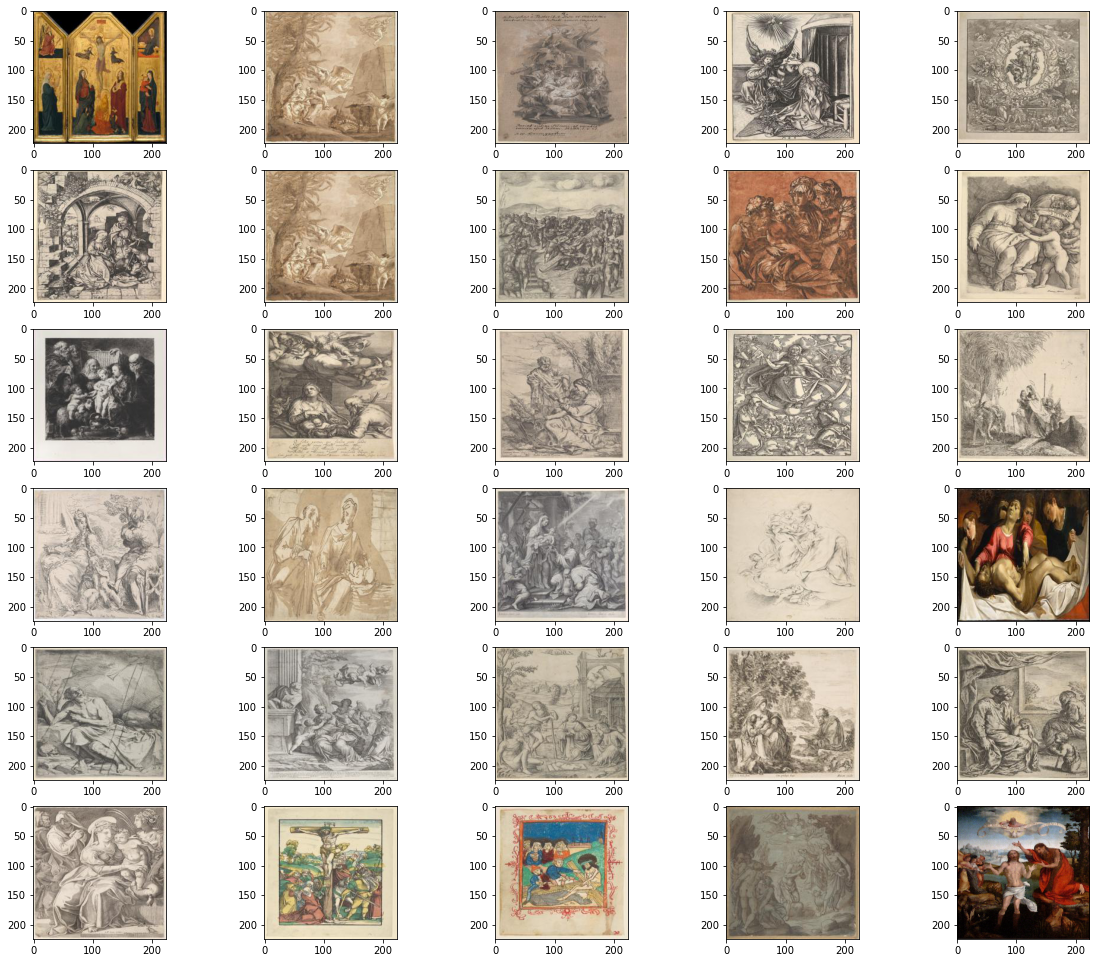

In [12]:
idx = np.random.choice(train_imgs.shape[0], 30)
show_images(train_imgs[idx] / 255.0)

<ipython-input-11-a1a747895944>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


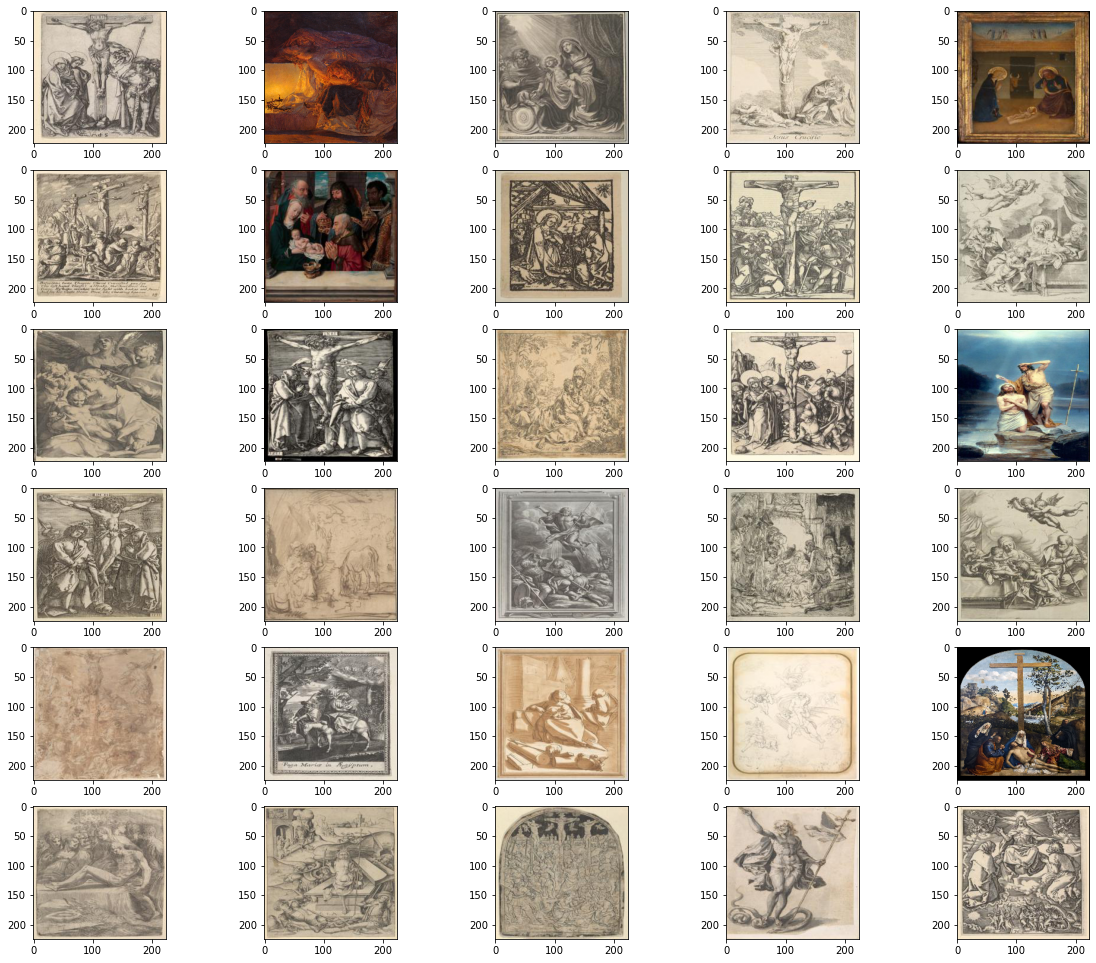

In [13]:
idx = np.random.choice(test_imgs.shape[0], 30)
show_images(test_imgs[idx] / 255.0)

## 画像をファイル出力 

In [14]:
def save_np_img(images, output):
    os.makedirs(output, exist_ok=True)
    for i, image in tqdm(enumerate(images)): 
        pil_img = Image.fromarray(image)
        pil_img.save(output + f"/{i}.jpg")

In [15]:
save_np_img(train_imgs, OUTPUT + "/train")

In [16]:
save_np_img(test_imgs, OUTPUT + "/test")

In [17]:
train = pd.DataFrame({"label": train_labels})
train = train.reset_index().rename(columns={"index": "image_id"})
train.to_csv(OUTPUT + "/train.csv", index=False)
train

,image_id,label
0,0,5
1,1,11
2,2,8
3,3,2
4,4,6
...,...,...
649,649,2
650,650,3
651,651,2
652,652,0


In [14]:
test = pd.DataFrame({"label": range(test_imgs.shape[0])})
test = test.reset_index().rename(columns={"index": "image_id"})
test["label"] = np.nan
test.to_csv(OUTPUT + "/test.csv", index=False)
test

,image_id,label
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
492,492,NaN
493,493,NaN
494,494,NaN
495,495,NaN
